<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Roberto Barceló


### **Link de repositorio de GitHub:** `http://....`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 21.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [3]:
df_players = pd.read_csv('/content/drive/MyDrive/MDS7202_LPCPCD/Lab 7/stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



In [4]:
### Código aquí ###
def seleccionado(row):
  if pd.isnull(row['National_Position']):
    return 0
  else:
    return 1

df_players['Seleccionado'] = df_players.apply(lambda row: seleccionado(row), axis=1)
df_players[['National_Position','Seleccionado']]

,National_Position,Seleccionado
0,LS,1
1,RW,1
2,LW,1
3,LS,1
4,GK,1
...,...,...
17583,NaN,0
17584,NaN,0
17585,NaN,0
17586,NaN,0


In [5]:
# veamos la cantidad de jugadores seleccionados y no seleccionados
df_players['Seleccionado'].value_counts()

0    16513
1     1075
Name: Seleccionado, dtype: int64

**Respuesta:** 

Vemos que tenemos 1075 ejemplos de jugadores que son seleccionados nacionales y 16513 ejemplos de jugadores que no lo son.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [X] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [X] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [X] Crear 3 ``pipelines`` con diferentes clasificadores.
- [X] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [X] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

In [6]:
# primero cambiamos el dtype de las variables Weak_foot y Skill_Moves. Para ello las pasamos a int16 y este formato lo pasamos a categorical
df_ply = df_players.astype({'Weak_foot': np.int16, 'Skill_Moves': np.int16})
df_ply = df_ply.drop(['National_Position'],axis=1)
# veamos los indices de las diferentes variables, searadas en numericas y categoricas
numerical_idx = df_ply.select_dtypes(include=['int64','float64']).columns.drop('Seleccionado')
categorical_idx = df_ply.select_dtypes(include=['object','bool','int16']).columns

# describamos el trasnfomer
t = [('cat', OneHotEncoder(handle_unknown="ignore"), categorical_idx),('num', MinMaxScaler(), numerical_idx)]
transformer = ColumnTransformer(transformers=t, remainder='passthrough')
print(numerical_idx)

print('--------')

print(categorical_idx)

Index(['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object')
--------
Index(['Name', 'Nationality', 'Club_Position', 'Preffered_Foot', 'Work_Rate',
       'Weak_foot', 'Skill_Moves'],
      dtype='object')


In [7]:
### Código aquí ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# creamos 3 pipelines con diferentes clasificadores
# nearest neighbors
model_1= KNeighborsClassifier()
pipe_1 = Pipeline(steps=[('prep',transformer), ('m', model_1)])
# SVM
model_2= SVC()
pipe_2 = Pipeline(steps=[('prep',transformer), ('m', model_2)])
# Random Forest
model_3= RandomForestClassifier()
pipe_3 = Pipeline(steps=[('prep',transformer), ('m', model_3)])

**Respuesta:**

Se separaron las columnas de features en dos tipos. Aquellas definidas como categóricas y aquellas definidas como numéricas. Para el procesamiento de las variables numéricas se utiliza MinMaxScaler. Esto debido a que la naturaleza de los posiciones que juegan los jugadores, los sueldos y su calidad de seleccionados depende fuertemente de características que podrían se clasificadas como outliers. En caso de no normalizar y estandarizar, asignaríamops una menor magnitud a estos valores considerados como outliers.

En el caso de las variables categóricas utilizamos OneHotEncoding, para así definir apropiadamente las variables relevantes, de modo one-hot.

Eliminamos la columna National_Position. Esto debidoa la gran cantidad de valores nulos y porque la información que esta entrega se encuentra contenida en la nueva columna denominada Seleccionado.

Los pipeline seleccionados corresponden a la naturaleza de clasificación del problema propuesto.

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [X] Separar el conjunto de datos en entrenamiento y de prueba.
- [X] Entrenar los `pipelines`.
- [X] Utilizar las métricas para evaluar los modelos generados.


In [8]:
### Código aquí ###
# Para el conjunto de entrenamiento separamos entre las calses por prtedecir y los atributos. 
# Tambien quitamos la clase National_Position, ya que esta aporta informacion sobre si participa o no en la seleccion.
# insurance_df[insurance_df.columns.drop(y_col)]
X = df_ply[df_ply.columns.drop('Seleccionado')]
y = df_ply['Seleccionado']

# separamos en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, 
                                   shuffle=True)

In [9]:
# utilizamos los pipelines para entrenar
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
# 1
pipe_1.fit(X_train, y_train)
pred_1 = pipe_1.predict(X_test)
# testing
acc_1 = accuracy_score(y_test,pred_1)
f1_1 = f1_score(y_test,pred_1)
cks_1 = cohen_kappa_score(y_test,pred_1)

# 2
pipe_2.fit(X_train, y_train)
pred_2 = pipe_2.predict(X_test)
# testing
acc_2 = accuracy_score(y_test,pred_2)
f1_2 = f1_score(y_test,pred_2)
cks_2 = cohen_kappa_score(y_test,pred_2)

# 3
pipe_3.fit(X_train, y_train)
pred_3 = pipe_3.predict(X_test)
# testing
acc_3 = accuracy_score(y_test,pred_3)
f1_3 = f1_score(y_test,pred_3)
cks_3 = cohen_kappa_score(y_test,pred_3)

resultados = pd.DataFrame({'Modelo':['KNN','SVC','Random Forest'],'Accuracy':[acc_1,acc_2,acc_3],'f1_score':[f1_1,f1_2,f1_3],'cohen_kappa_score':[cks_1,cks_2,cks_3]})
resultados

,Modelo,Accuracy,f1_score,cohen_kappa_score
0,KNN,0.939170,0.110803,0.101150
1,SVC,0.938222,0.023952,0.022488
2,Random Forest,0.938980,0.058480,0.054329


In [10]:
# veamos los classification report de los 3 modelos
print('KNN')
print(classification_report(y_test, pred_1))

print('SVC')
print(classification_report(y_test, pred_2))

print('Random Forest')
print(classification_report(y_test, pred_3))

KNN
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4947
           1       0.65      0.06      0.11       330

    accuracy                           0.94      5277
   macro avg       0.79      0.53      0.54      5277
weighted avg       0.92      0.94      0.91      5277

SVC
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4947
           1       1.00      0.01      0.02       330

    accuracy                           0.94      5277
   macro avg       0.97      0.51      0.50      5277
weighted avg       0.94      0.94      0.91      5277

Random Forest
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4947
           1       0.83      0.03      0.06       330

    accuracy                           0.94      5277
   macro avg       0.89      0.51      0.51      5277
weighted avg       0.93      0.94      0.91      527

**Respuesta:**

Vemos que los valores de las métricas en general no son positivos para la clase positiva. Destacando el valor de precision, recall y f1 score, podemos ver que los clasificadores son deficientes a la hora de separar aquellos jugadores que son seleccionados y aquellos que no.

Probablemente estos resultados son producto del desbalance de los datos, ya que la cantidad de selecciones y por tanto jugadores de selección son reducidas. Una forma de mejorar este tipo de clasificadores es con un umento de la cantidad de datos. De esta forma podríamos tener la nacionalidad de mas jugadores y sus posiciones y veríamos que el factor posición de juego tendría un mayor peso dependiendo de la selección a la que correspondan. También se podrían agregar mayor cantidad de featurees, como competitividad del club en el que juegan, trayectoria, sueldo, etc...

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [X] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [X] Cuente cuantos por clase quedan.
- [X] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [ ] Comente los resultados obtenidos.

**Respuesta:**

In [13]:
df_players['Club_Position']

0         LW
1         RW
2         LW
3         ST
4         GK
        ... 
17583    Sub
17584    Sub
17585    Res
17586    Sub
17587    Sub
Name: Club_Position, Length: 17588, dtype: object

In [40]:
### Código aquí ###
# reclasificamos la columna
dic_nuevas_clases = {'ST' : 'ataque',
                     'CF':'ataque',
                     'RW' : 'central_ataque',
                     'CAM':'central_ataque',
                     'LW':'central_ataque', 
                     'RM':'central',
                     'CM':'central',
                     'LM':'central', 
                     'RWB':'central_defensa',
                     'CDM':'central_defensa',
                     'LWB':'central_defensa',
                     'RB':'defensa',
                     'CB':'defensa',
                     'LB':'defensa',
                     'GK':'arquero'}
# reemplazamos las variables 
df_players = df_players.replace({'Club_Position':dic_nuevas_clases})

In [41]:
df_players['Club_Position'].value_counts()

defensa            1180
central             907
RCB                 633
arquero             632
LCB                 631
central_ataque      581
ataque              430
LCM                 354
RCM                 353
LDM                 266
RDM                 266
central_defensa     209
RS                  206
LS                  205
LAM                  36
RAM                  36
LF                   12
RF                   12
Name: Club_Position, dtype: int64

In [42]:
# descartamos las filas en donde el valor de club_position sea Sub o Res
df_players = df_players[(df_players['Club_Position'] != 'Sub') & (df_players['Club_Position'] !='Res') ]
df_players['Club_Position'].value_counts()

defensa            1180
central             907
RCB                 633
arquero             632
LCB                 631
central_ataque      581
ataque              430
LCM                 354
RCM                 353
LDM                 266
RDM                 266
central_defensa     209
RS                  206
LS                  205
LAM                  36
RAM                  36
LF                   12
RF                   12
Name: Club_Position, dtype: int64

In [43]:
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado
0,Cristiano Ronaldo,Portugal,LS,central_ataque,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,central_ataque,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,central_ataque,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,LS,ataque,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,arquero,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17310,Tom Bolarinwa,England,NaN,central,180,80,Right,26,Medium / Medium,3,...,54,22,38,37,37,37,32,29,29,0
17312,Zak Mills,England,NaN,defensa,182,83,Right,24,Medium / Medium,4,...,61,43,22,24,28,30,32,39,31,0
17442,Wataru Hashimoto,Japan,NaN,defensa,181,72,Left,30,Medium / High,2,...,71,41,29,26,26,25,25,31,29,0
17461,Callum Cooke,England,NaN,LCM,172,72,Right,20,Medium / Medium,3,...,63,57,48,50,54,42,33,69,40,0


Procedemos a entrenar el nuevo pipeline

In [56]:
# primero cambiamos el dtype de las variables Weak_foot y Skill_Moves. Para ello las pasamos a int16 y este formato lo pasamos a categorical
df_ply_2 = df_players.astype({'Weak_foot': np.int16, 'Skill_Moves': np.int16})
# eliminamos la columna national position por tener muchos valores nulos
df_ply_2 = df_ply_2.drop(['National_Position'],axis=1)
# eliminamos las filas con valores nulos en Club_position
df_ply_2 = df_ply_2.dropna(subset=['Club_Position'])
# veamos los indices de las diferentes variables, searadas en numericas y categoricas
numerical_idx_2 = df_ply_2.select_dtypes(include=['int64','float64']).columns
categorical_idx_2 = df_ply_2.select_dtypes(include=['object','bool','int16']).columns.drop('Club_Position')

# describamos el trasnfomer
t_2 = [('cat', OneHotEncoder(handle_unknown="ignore"), categorical_idx_2),('num', MinMaxScaler(), numerical_idx_2)]
transformer_2 = ColumnTransformer(transformers=t_2, remainder='passthrough')
print(numerical_idx_2)

print('--------')

print(categorical_idx_2)

Index(['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'Seleccionado'],
      dtype='object')
--------
Index(['Name', 'Nationality', 'Preffered_Foot', 'Work_Rate', 'Weak_foot',
       'Skill_Moves'],
      dtype='object')


In [57]:
### Código aquí ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# creamos 3 pipelines con diferentes clasificadores
# nearest neighbors
model_1= KNeighborsClassifier()
pipe_1 = Pipeline(steps=[('prep',transformer_2), ('m', model_1)])
# SVM
model_2= SVC()
pipe_2 = Pipeline(steps=[('prep',transformer_2), ('m', model_2)])
# Random Forest
model_3= RandomForestClassifier()
pipe_3 = Pipeline(steps=[('prep',transformer_2), ('m', model_3)])

Generamos los datos de entrenameinto y validacion

In [58]:
# Para el conjunto de entrenamiento separamos entre las calses por predecir y los atributos. 
X = df_ply_2[df_ply_2.columns.drop('Club_Position')]
y = df_ply_2['Club_Position']

# separamos en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, 
                                   shuffle=True)

Entrenamos los pipeline

In [62]:
# utilizamos los pipelines para entrenar
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
# 1
pipe_1.fit(X_train, 
           y_train)
pred_1 = pipe_1.predict(X_test)
# testing
acc_1 = accuracy_score(y_test,pred_1)
f1_1 = f1_score(y_test,pred_1,average='weighted')
cks_1 = cohen_kappa_score(y_test,pred_1)

# 2
pipe_2.fit(X_train, y_train)
pred_2 = pipe_2.predict(X_test)
# testing
acc_2 = accuracy_score(y_test,pred_2)
f1_2 = f1_score(y_test,pred_2,average='weighted')
cks_2 = cohen_kappa_score(y_test,pred_2)

# 3
pipe_3.fit(X_train, y_train)
pred_3 = pipe_3.predict(X_test)
# testing
acc_3 = accuracy_score(y_test,pred_3)
f1_3 = f1_score(y_test,pred_3,average='weighted')
cks_3 = cohen_kappa_score(y_test,pred_3)

resultados = pd.DataFrame({'Modelo':['KNN','SVC','Random Forest'],'Accuracy':[acc_1,acc_2,acc_3],'f1_score':[f1_1,f1_2,f1_3],'cohen_kappa_score':[cks_1,cks_2,cks_3]})

In [63]:
# veamos los resultados de la prediccion del modelo
resultados

,Modelo,Accuracy,f1_score,cohen_kappa_score
0,KNN,0.391847,0.386519,0.327325
1,SVC,0.520384,0.457873,0.459517
2,Random Forest,0.494964,0.440187,0.429708


In [64]:
# veamos los classification report de los 3 modelos
print('KNN')
print(classification_report(y_test, pred_1))

print('SVC')
print(classification_report(y_test, pred_2))

print('Random Forest')
print(classification_report(y_test, pred_3))

KNN
                 precision    recall  f1-score   support

            LAM       0.06      0.08      0.07        12
            LCB       0.28      0.44      0.35       166
            LCM       0.14      0.16      0.15       117
            LDM       0.14      0.12      0.13        84
             LF       0.00      0.00      0.00         2
             LS       0.11      0.16      0.13        45
            RAM       0.33      0.08      0.12        13
            RCB       0.45      0.41      0.43       191
            RCM       0.18      0.14      0.16       119
            RDM       0.24      0.19      0.21        83
             RF       0.00      0.00      0.00         7
             RS       0.20      0.07      0.10        75
        arquero       1.00      1.00      1.00       196
         ataque       0.46      0.42      0.44       133
        central       0.34      0.40      0.37       267
 central_ataque       0.30      0.23      0.26       166
central_defensa       0.00

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

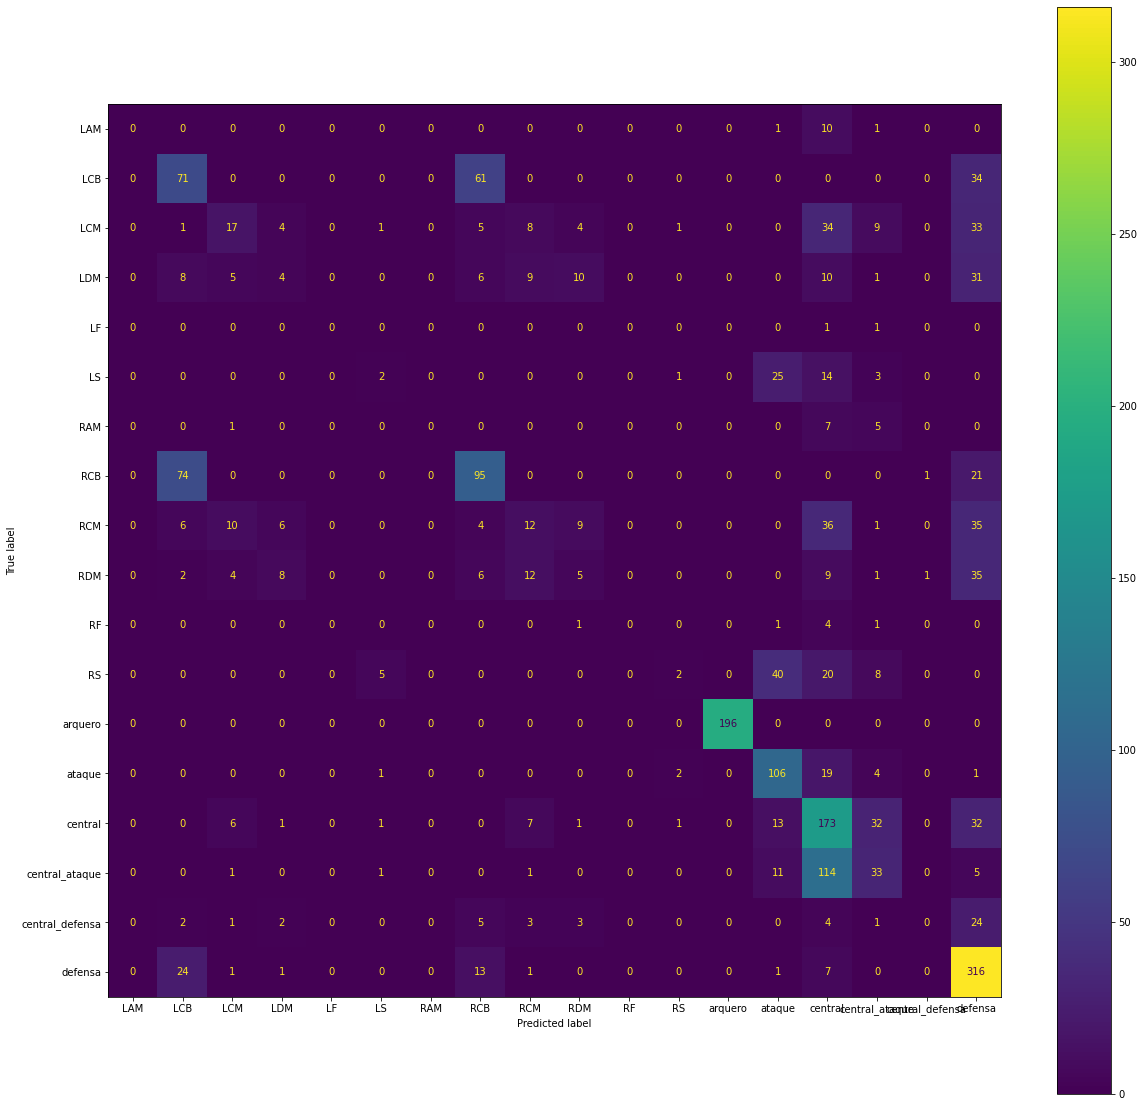

In [75]:
# veamos la matriz de confusion del tercer clasificador (Random Forest)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
categorias = ['LAM',      
            'LCB',       
            'LCM',       
            'LDM',       
             'LF',       
             'LS',      
            'RAM',       
            'RCB',       
            'RCM',      
            'RDM',       
             'RF',       
             'RS',       
        'arquero',       
         'ataque',       
        'central',      
 'central_ataque','central_defensa',       
        'defensa' ]
cm = confusion_matrix(y_test, pred_3,labels=pipe_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_3.classes_)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)

**Respuesta**:

```
Vemos que los resultados obtenidos en estos modelos son superiores al performance de el modelo anterior. Existen estadísticas claras que determinan la posición en la que los jugadores tienen mayor impacto. Algunas conclusiones interesantes que se pueden obtener de estos modelos es que existen jugadores que podrían desempeñarse bien en múltiples posiciones.

Centrales y centrales ataque son clases relativamente indestinguibles, con jugadores polivalentes en ambos conjuntos. Esto se condice con lo que ocurre en la realidad por consejo experto, donde se ve rotación en estas posiciones para los jugadores.

Vemos por otro lado que los defensas tienden a ser especialistas en su posición, donde sus estadísticas se ven fuertemente afectadas por sus oportunidades de generación de juego y de intentos al arco.
```

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [X] Explique en que consiste la métrica $R^2$
- [X] Generar un pipeline para la regresión.
- [X] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [X] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

La métrica $R^2$ corresponde a una medida de la correlacion entre el valor de las variables y las mejores predicciones provenientes del clasificador. Resulkta útil para problemas de regresión debido a que no se esperan resultados deterministacmente idénticos y de tipo categórico. Por lo que se evalúa la cercanía de los resultados esperados a los resultados predichos.

In [124]:
### Código aquí ###
df_sueldos = pd.read_csv('/content/drive/MyDrive/MDS7202_LPCPCD/Lab 7/sueldos.csv')
df_sueldos

,Unnamed: 0,Player,Weekly Salary
0,1528,Lionel Messi,1538905.0
1,1006,Cristiano Ronaldo,1248536.0
2,1529,Antoine Griezmann,997032.0
3,2004,Neymar,797726.0
4,1530,Gareth Bale,607706.0
...,...,...,...
2529,1527,Simone Ghidotti,283.0
2530,2539,Valentin Gendrey,100.0
2531,1001,John Yeboah,70.0
2532,1000,Antonis Aidonis,70.0


In [125]:
# cambiamos el nombre de la columna Player a Name
df_sueldos = df_sueldos.rename(columns={'Player':'Name'})

Generamos un nuevo dataframe que concatena el dataframe original con el de sueldos, usando como llave los nombres de los jugadores

In [126]:
df_jugador_sueldos = pd.merge(df_players,df_sueldos, on='Name')
df_jugador_sueldos

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado,Unnamed: 0,Weekly Salary
0,Cristiano Ronaldo,Portugal,LS,central_ataque,185,80,Right,32,High / Low,4,...,92,93,90,81,76,85,88,1,1006,1248536.0
1,Lionel Messi,Argentina,RW,central_ataque,170,72,Left,29,Medium / Medium,4,...,85,95,88,89,90,74,85,1,1528,1538905.0
2,Neymar,Brazil,LW,central_ataque,174,68,Right,25,High / Medium,5,...,78,89,77,79,84,81,83,1,2004,797726.0
3,Luis Suárez,Uruguay,LS,ataque,182,85,Right,30,High / Medium,4,...,87,94,86,86,84,85,88,1,1531,508923.0
4,Manuel Neuer,Germany,GK,arquero,193,92,Right,31,Medium / Medium,4,...,25,13,16,14,11,47,11,1,498,326233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,Charles Traoré,Mali,NaN,defensa,180,74,Left,25,Medium / Low,2,...,27,30,32,38,40,45,29,0,2229,13289.0
983,Will Norris,England,NaN,arquero,191,76,Left,23,Medium / Medium,3,...,18,10,10,17,18,16,12,0,485,3958.0
984,Sean Longstaff,England,NaN,LCM,181,73,Right,19,Medium / Medium,3,...,53,58,51,51,46,54,53,0,494,913.0
985,Harvey Barnes,England,NaN,central_ataque,179,68,Left,19,Medium / Medium,3,...,57,50,52,56,52,49,50,0,463,13193.0


Reiteramos los pasos anteriores, donde definimos un transformer para realizar el encoding de los datos, luego definimos un modelo de regresión y posteriormente el pipeline que será entrenado.

In [193]:
# primero cambiamos el dtype de las variables Weak_foot y Skill_Moves. Para ello las pasamos a int16 y este formato lo pasamos a categorical
df_ply_3 = df_jugador_sueldos.astype({'Weak_foot': np.int16, 'Skill_Moves': np.int16})
# eliminamos la columna national position por tener muchos valores nulos
df_ply_3 = df_ply_3.drop(['National_Position'],axis=1)
# eliminamos las columnas nombres y nationality ya que no aporta información sobre los stats para estimar el sueldo
df_ply_3 = df_ply_3.drop(['Name','Nationality'],axis=1)
# eliminamos la columna Unnamed: 0 por no aportar informacion relevante
df_ply_3 = df_ply_3.drop(['Unnamed: 0'],axis=1)
# eliminamos las filas con valores nulos en Club_position
df_ply_3 = df_ply_3.dropna(subset=['Club_Position'])
# veamos los indices de las diferentes variables, searadas en numericas y categoricas
numerical_idx_3 = df_ply_3.select_dtypes(include=['int64','float64']).columns.drop('Weekly Salary')
categorical_idx_3 = df_ply_3.select_dtypes(include=['object','bool','int16']).columns

# describamos el trasnfomer
#t_3 = [('cat', OneHotEncoder(handle_unknown="ignore"), categorical_idx_2),('num', MinMaxScaler(), numerical_idx_2)]
t_3 = [('cat', OneHotEncoder(handle_unknown="ignore"), categorical_idx_3),('num', MinMaxScaler(), numerical_idx_3)]
transformer_3 = ColumnTransformer(transformers=t_3,sparse_threshold=0, remainder='passthrough')
print(numerical_idx_3)

print('--------')

print(categorical_idx_3)

Index(['Height', 'Weight', 'Age', 'Ball_Control', 'Dribbling', 'Marking',
       'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'Seleccionado'],
      dtype='object')
--------
Index(['Club_Position', 'Preffered_Foot', 'Work_Rate', 'Weak_foot',
       'Skill_Moves'],
      dtype='object')


In [194]:
df_ply_3.dtypes

Club_Position         object
Height                 int64
Weight                 int64
Preffered_Foot        object
Age                    int64
Work_Rate             object
Weak_foot              int16
Skill_Moves            int16
Ball_Control           int64
Dribbling              int64
Marking                int64
Sliding_Tackle         int64
Standing_Tackle        int64
Aggression             int64
Reactions              int64
Interceptions          int64
Vision                 int64
Composure              int64
Crossing               int64
Short_Pass             int64
Long_Pass              int64
Acceleration           int64
Speed                  int64
Stamina                int64
Strength               int64
Balance                int64
Agility                int64
Jumping                int64
Heading                int64
Shot_Power             int64
Finishing              int64
Long_Shots             int64
Curve                  int64
Freekick_Accuracy      int64
Penalties     

In [195]:
df_ply_3

,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,...,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,Seleccionado,Weekly Salary
0,central_ataque,185,80,Right,32,High / Low,4,5,93,92,...,85,92,93,90,81,76,85,88,1,1248536.0
1,central_ataque,170,72,Left,29,Medium / Medium,4,4,95,97,...,71,85,95,88,89,90,74,85,1,1538905.0
2,central_ataque,174,68,Right,25,High / Medium,5,5,95,96,...,62,78,89,77,79,84,81,83,1,797726.0
3,ataque,182,85,Right,30,High / Medium,4,4,91,86,...,77,87,94,86,86,84,85,88,1,508923.0
4,arquero,193,92,Right,31,Medium / Medium,4,1,48,30,...,25,25,13,16,14,11,47,11,1,326233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,defensa,180,74,Left,25,Medium / Low,2,2,39,67,...,45,27,30,32,38,40,45,29,0,13289.0
983,arquero,191,76,Left,23,Medium / Medium,3,1,20,13,...,11,18,10,10,17,18,16,12,0,3958.0
984,LCM,181,73,Right,19,Medium / Medium,3,2,59,54,...,51,53,58,51,51,46,54,53,0,913.0
985,central_ataque,179,68,Left,19,Medium / Medium,3,3,59,62,...,40,57,50,52,56,52,49,50,0,13193.0


In [242]:
# Para el conjunto de entrenamiento separamos entre el valor a regresionar y los atributos. 
X = df_ply_3[df_ply_3.columns.drop('Weekly Salary','Work_Rate')]
y = df_ply_3['Weekly Salary']

# separamos en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, 
                                   shuffle=True)

In [279]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
# creamos 5 pipelines con diferentes regresores
# Lasso
model_1= Lasso(alpha=800)
pipe_1 = Pipeline(steps=[('prep',transformer_3), ('m', model_1)])
# SVR
model_2= SVR(kernel='poly', C=10000)
pipe_2 = Pipeline(steps=[('prep',transformer_3), ('m', model_2)])
# Ridge
model_3= Ridge(alpha=45)
pipe_3 = Pipeline(steps=[('prep',transformer_3), ('m', model_3)])
# Bayesian Rdige
model_4= BayesianRidge()
pipe_4 = Pipeline(steps=[('prep',transformer_3), ('m', model_4)])
# Random Forest Regression
model_5= RandomForestRegressor(n_estimators=300)
pipe_5 = Pipeline(steps=[('prep',transformer_3), ('m', model_5)])

Entrenamos los pipeline

In [280]:
# utilizamos los pipelines para entrenar
from sklearn.metrics import r2_score
# 1
pipe_1.fit(X_train, 
           y_train)
pred_1 = pipe_1.predict(X_test)
# testing
r2_1 = r2_score(y_test,pred_1)

# 2
pipe_2.fit(X_train, y_train)
pred_2 = pipe_2.predict(X_test)
# testing
r2_2 = r2_score(y_test,pred_2)

# 3
pipe_3.fit(X_train, y_train)
pred_3 = pipe_3.predict(X_test)
# testing
r2_3 = r2_score(y_test,pred_3)

# 4
pipe_4.fit(X_train, y_train)
pred_4 = pipe_4.predict(X_test)
# testing
r2_4 = r2_score(y_test,pred_4)

# 5
pipe_5.fit(X_train, y_train)
pred_5 = pipe_5.predict(X_test)
# testing
r2_5 = r2_score(y_test,pred_5)

resultados = pd.DataFrame({'Modelo':['Lasso','SVR','Ridge','Bayesian_Ridge','Random_Forest_Regressor'],'R^2 Score':[r2_1,r2_2,r2_3,r2_4,r2_5]})
resultados

,Modelo,R^2 Score
0,Lasso,0.301399
1,SVR,0.381409
2,Ridge,0.343134
3,Bayesian_Ridge,0.262740
4,Random_Forest_Regressor,0.508707


Viendo estos resultados, vemos que tanto un modelo basado en Support Vector Machines como Random Forest obtienen los mejores resultados a nivel de métricas R^2.

Esto debido a la naturaleza de los datos, en donde tenemos pocas files de datos y variadas columnas. No sabemos el nivel de importancia de las columnas, por lo que se utilizan modelos de regresión que son eficientes pára pocos atributos (SVR) y modelos eficientes para multiples atributos (RFR). Se puede especular, debido al alto nivel de regularización requerido y a lois resultados obtenidos para regresores que consideran pocos atributos (Lasso), quee xiste una corelación entre multiples atributos difícil de describir por un estimador mas simple.

Debido a los esultados se recomienda el uso de un modelo de estimación tipo Random Forest Regressor.

**Respuesta**:

```
Los resultados tienden a ser bastante satisfactorios a nivel de métricas. Si bien la correlación no es perfecta se marca una tendencia por sobre el proceso aleatorio. Una posible solución a este problema y debido al tipo de modelo que se utiliza podría ser agregar atributos relevantes. Estos podrían ser las métricas históricas de los jugadores (periódos anteriores), o métricas avanzadas no incluidas. El aumentar la cantidad de datos también podría ser beneficioso hasta cierto punto, pero se tendría que evaluar cuando los modelos de regresión comienzan a saturarse por el tamaño del conjutno de entrenamiento.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>